# Characteristics in the CRTS QSO catalog

To investigate the relation between the flux variability and the physical paramter in QSO, we will use the CRTS QSO catalog. 
Before utilising a complicated analysis, deep learning methodology, we briefly check the characteristics of the catalog in this notebook. 
<hr>
I added following information to the catalog: <br>

'Av' (mag): Total extinction at the V band  <br>
'Av_cr' (mag): Total extinction at the Catalina Survey clear filter
    ($\lambda_{\mathrm{eff}} = 5237.44\ \mathrm{\mathring{A}}$; [SVO](http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?id=Misc/CRTS.C&&mode=browse&gname=Misc&gname2=CRTS))<br>
'Av_ct' (mag): Total extinction at the CTIO V ($\lambda_{\mathrm{eff}} = 5517\ \mathrm{\mathring{A}}$)<br>
'Bol_Lum' (erg/s): Bolometric luminosity calculated with redshift and Av_cr<br>
'sigma'  (mag$^2$/day): $\sigma$ in CAR(1) model <br>
'tau' (day): $\tau$ in CAR(1) model  <br>
'RedChiSq'  (mag$^2$): $\chi^{2}$/d.o.f in the CAR(1) model fit<br>
'convergence' : Convergence in the CAR(1) model fit (True/False)<br>
'PS1_id': Object id of the counterpart in Pan-STARSS catalog (DR1)<br>
'sg_score': sg_score (1: point source, 0: extended object)<br>
'specObjID' : Object id of the counterpart in SDSS spectroscopic catalog (DR14)<br>
'z': Redshift of SDSS counterpart<br>
'zErr': Error in 'z'<br>
'class': Spectroscopic classification (STAR, QSO, or GALAXY)<br>
'LOGBH' ($M_{\odot}$): Virial blackhole mass ([Shen+11](http://iopscience.iop.org/article/10.1088/0067-0049/194/2/45/meta))<br>
'LOGBH_ERR' ($M_{\odot}$): Error in 'LOGBH'<br>
'MeanDeltaT' (day): Average of the interval in the light curve (Mean($t_i - t_{i-1}$))<br>
'MeanMag' (mag): Average of the magnitude in the light curve<br>
'MedDeltaT' (day): Median of the interval in the light curve (Median($t_i - t_{i-1}$))<br>
'Nobs': Number of observation in the light curve<br>
'ObsLength' (day): Baseline of the light curve<br>
'Variance'  (mag$^2$): Intrinsic variance of the light curve ($ \sum\left[(M_{i} - \overline{M})^2\right] /(Nobs-1)- \overline{Merr}^2$)<br>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import MyPlot as mp
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
cmap_qso = sns.cubehelix_palette(rot=0.5, light=0.7,dark=0.3,as_cmap=True)
cmap_gal = sns.cubehelix_palette(start=0.3,rot=-0.5,light=0.7,dark=0.3,as_cmap=True)

In [2]:
cat = pd.read_csv('../../Catalogs/CRTS_QSO_catalog.csv')

In [114]:
cat.columns

Index(['Obj_name', 'CRTS_id', 'ra', 'dec', 'magnitude', 'redshift', 'Av',
       'Av_cr', 'Av_ct', 'Bol_Lum', 'sigma', 'tau', 'RedChiSq', 'convergence',
       'PS1_id', 'sg_score', 'specObjID', 'z', 'zErr', 'class', 'LOGBH',
       'LOGBH_ERR', 'MeanDeltaT', 'MeanMag', 'MedDeltaT', 'Nobs', 'ObsLength',
       'Variance'],
      dtype='object')

In [3]:
cat[0:5]

,Obj_name,CRTS_id,ra,dec,magnitude,redshift,Av,Av_cr,Av_ct,Bol_Lum,...,zErr,class,LOGBH,LOGBH_ERR,MeanDeltaT,MeanMag,MedDeltaT,Nobs,ObsLength,Variance
0,WISEA_J004115.99-024147.0,1001004002534,10.31658,-2.69638,17.9075,0.700,0.106204,0.113390,0.111,2.681025e+45,...,NaN,NaN,NaN,NaN,45.558542,17.878221,13.482923,67,3006,0.012977
1,NPM1-02.0084,1001004004371,10.60691,-2.58246,17.8457,0.988,0.088981,0.095003,0.093,6.541290e+45,...,0.000111,QSO,NaN,NaN,44.495931,17.809389,14.020293,87,3826,0.006741
2,PGC_1089590,1001004005573,9.53113,-2.52580,16.2807,0.111,0.102377,0.109304,0.107,1.726233e+44,...,0.000014,GALAXY,NaN,NaN,44.495935,16.289243,14.020929,87,3826,0.001042
3,PGC_1094100,1001004008116,8.62651,-2.36634,16.7273,0.087,0.089938,0.096024,0.094,6.719290e+43,...,0.000014,GALAXY,NaN,NaN,43.984477,16.723396,13.973942,88,3826,0.001106
4,SDSS_J003606.03-021229.9,1001004010795,9.02507,-2.20832,17.5757,0.303,0.091852,0.098067,0.096,4.845680e+44,...,0.000028,QSO,NaN,NaN,45.558541,17.544927,13.482332,67,3006,0.007982


In [4]:
cat.iloc[np.where(~np.isnan(cat.LOGBH))[0][0]]

Obj_name       SDSS_J003413.04-010026.9
CRTS_id                   1001004031729
ra                              8.55451
dec                             -1.0074
magnitude                       17.1158
redshift                          1.292
Av                            0.0669753
Av_cr                         0.0715073
Av_ct                              0.07
Bol_Lum                     2.44239e+46
sigma                        0.00557763
tau                              205.62
RedChiSq                        1.33652
convergence                        True
PS1_id                       1.0679e+17
sg_score                       0.992098
specObjID                   4.41422e+17
z                               1.29243
zErr                         0.00020705
class                               QSO
LOGBH                           9.44517
LOGBH_ERR                     0.0461646
MeanDeltaT                      44.4959
MeanMag                         17.1162
MedDeltaT                       14.0269


In [5]:
sg_qso = cat.sg_score>0.83
sg_gal = cat.sg_score<=0.83
spec_qso = cat['class'] == 'QSO'
spec_gal = cat['class'] == 'GALAXY'
NoInfo = ~(sg_qso | sg_gal | spec_qso | spec_gal)

In [6]:
print("""CRTS QSO catalog consists %d sources. \n
%d sources in the catalog has a  PS1 counterpart (within 1 arcsec). 
Of these, %d are a point source, and %d are an extended object. \n
%d sources in the catalog has a SDSS spectral classification. 
Of these, %d are a QSO, and %d are a galaxy. 
"""%(len(cat), np.sum(sg_qso|sg_gal), np.sum(sg_qso), np.sum(sg_gal), 
    np.sum(spec_qso|spec_gal), np.sum(spec_qso), np.sum(spec_gal)))

CRTS QSO catalog consists 40736 sources. 

31479 sources in the catalog has a  PS1 counterpart (within 1 arcsec). 
Of these, 13037 are a point source, and 18442 are an extended object. 

21481 sources in the catalog has a SDSS spectral classification. 
Of these, 9243 are a QSO, and 12238 are a galaxy. 



## Two populations in the catalog

CRTS QSO catalog consists at least two pooulations, which is clearly shown 
in the distribution of redshift, bolometric luminosity (L$_{\mathrm{bol}}$), 
and time domain characteristics such as $\sigma$ (mag$^2$/day) and $\tau$ (day) 
derived with CAR(1) model, and variance (mag$^2$). 

The population with $z \lesssim 0.3$,  L$_{\mathrm{bol}} \lesssim 10^{45}\ \mathrm{(erg/s)}$, 
variance $\lesssim 10^{-3.5}\ \mathrm{mag}^2$, and $\tau \lesssim 100 \ \mathrm{day}$ 
is probably Setfert galaxy, while the other is QSO. 

The anticorrelation in
$\sigma^2$-L$_{\mathrm{bol}}$ 
and the correlation in $\tau$-L$_{\mathrm{bol}}$ 
shown in [Kelly+09](http://adsabs.harvard.edu/abs/2009ApJ...698..895K)
can be seen in our data, 
it probably is not an intrinsic relation but comes from a systematic bias in the data though. 

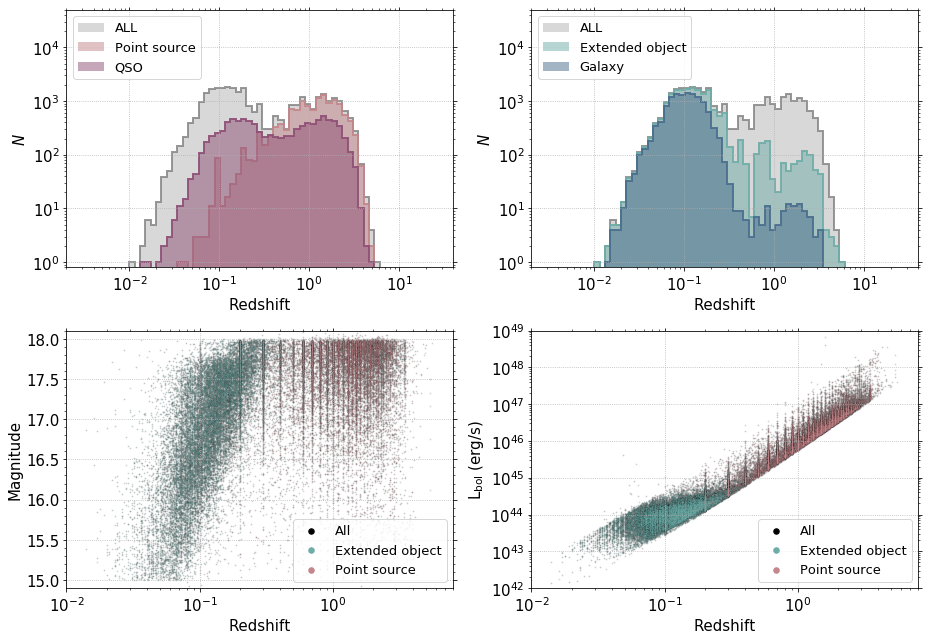

In [46]:
xlims = [1e-2, 8]
ylims = [0.8, 5e4]
plt.figure(figsize=(13, 9))
plt.subplot(2,2,1)
mp.hist(cat.redshift[~NoInfo], label='Redshift', log='both', xlims=xlims, ylims=ylims, alpha=0.3, legend='ALL')
mp.hist(cat.redshift[sg_qso], label='Redshift', log='both', xlims=xlims, ylims=ylims, alpha=0.5, ealpha=0.9, 
        legend='Point source', color = cmap_qso(0.25), initpl=False)
mp.hist(cat.redshift[spec_qso], label='Redshift', log='both', xlims=xlims, ylims=ylims, alpha=0.5, ealpha=0.9, 
        legend='QSO', color = cmap_qso(0.75), initpl=False)
plt.legend(loc = 'upper left', fontsize=13)
plt.subplot(2,2,2)
mp.hist(cat.redshift[~NoInfo], label='Redshift', log='both', xlims=xlims, ylims=ylims, alpha=0.3, legend='ALL')
mp.hist(cat.redshift[sg_gal], label='Redshift', log='both', xlims=xlims, ylims=ylims, alpha=0.5, ealpha=0.9, 
        legend='Extended object', color = cmap_gal(0.25), initpl=False)
mp.hist(cat.redshift[spec_gal], label='Redshift', log='both', xlims=xlims, ylims=ylims, alpha=0.5, ealpha=0.9, 
        legend='Galaxy', color = cmap_gal(0.75), initpl=False)
plt.legend(loc = 'upper left', fontsize=13)
plt.subplot(2,2,3)
ylims = [14.9, 18.1]
mp.scatter(cat.redshift, cat.MeanMag, label1='Redshift', label2='Magnitude', 
           xlims=xlims, ylims=ylims, log='x', color='black', alpha=0.1, s=1, legend='All')
mp.scatter(cat.redshift[sg_gal], cat.MeanMag[sg_gal], 
           xlims=xlims, ylims=ylims, log='x', color=cmap_gal(0.25), 
           alpha=0.25, initpl=False, legend='Extended object')
mp.scatter(cat.redshift[sg_qso], cat.MeanMag[sg_qso], 
           xlims=xlims, ylims=ylims, log='x', color=cmap_qso(0.25), 
           alpha=0.25, initpl=False, legend='Point source')
plt.legend(loc = 'lower right', fontsize=13)
plt.subplot(2,2,4)
ylims = [1e42, 1e49]
mp.scatter(cat.redshift, cat.Bol_Lum, label1='Redshift', label2=r'L$_{\mathrm{bol}}$ (erg/s)', 
           xlims=xlims, ylims=ylims, color='black', alpha=0.1, s=1, legend='All')
mp.scatter(cat.redshift[sg_gal], cat.Bol_Lum[sg_gal], 
           xlims=xlims, ylims=ylims, log='x', color=cmap_gal(0.25), 
           alpha=0.25, initpl=False, legend='Extended object')
mp.scatter(cat.redshift[sg_qso], cat.Bol_Lum[sg_qso], 
           xlims=xlims, ylims=ylims, log='x', color=cmap_qso(0.25), 
           alpha=0.25, initpl=False, legend='Point source')
plt.legend(loc = 'lower right', fontsize=13)
plt.tight_layout()

The catalog consists nearby galaxies (probably mainly Seyfert galaxies; extended, and intringically faint but apparently bright) and QSOs. 
The host galaxy might be resolbed in some QSOs, as some spectroscopically confirmed QSOs seem to be resolved on the image. 

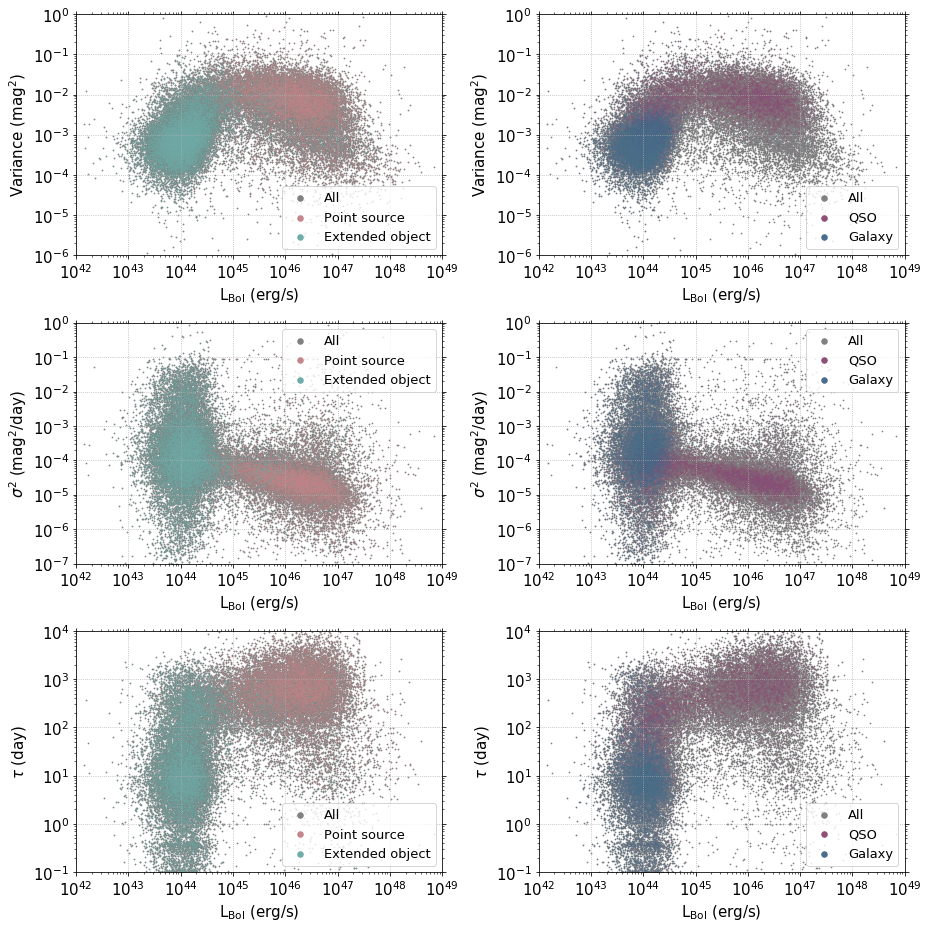

In [60]:
plt.figure(figsize=(13, 13))

plt.subplot(3,2,1)
mp.scatter(cat.Bol_Lum, cat.Variance, "$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", "Variance (mag$^2$)", 
           xlims=[1e42, 1e49], ylims=[1e-6, 1e0], s= 0.5, alpha=1, color = 'grey', 
           log='both', legend='All')
mp.scatter(cat.Bol_Lum[sg_qso], cat.Variance[sg_qso], 
           xlims=[1e42, 1e49], ylims=[1e-6, 1e0], 
           s= 0.5, alpha=0.25, color = cmap_qso(0.25), log='both', initpl=False, legend='Point source')
mp.scatter(cat.Bol_Lum[sg_gal], cat.Variance[sg_gal], 
           xlims=[1e42, 1e49], ylims=[1e-6, 1e0], 
           s= 0.5, alpha=0.25, color = cmap_gal(0.25), log='both', initpl=False, legend='Extended object')
plt.legend(fontsize=13)

plt.subplot(3,2,2)
mp.scatter(cat.Bol_Lum, cat.Variance, "$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", "Variance (mag$^2$)", 
           xlims=[1e42, 1e49], ylims=[1e-6, 1e0], s= 0.5, alpha=1, color = 'grey',  
           log='both', legend='All')
mp.scatter(cat.Bol_Lum[spec_qso], cat.Variance[spec_qso], 
           xlims=[1e42, 1e49], ylims=[1e-6, 1e0],       
           s= 0.5, alpha=0.25, color = cmap_qso(0.75), log='both', initpl=False, legend='QSO')
mp.scatter(cat.Bol_Lum[spec_gal], cat.Variance[spec_gal], 
           xlims=[1e42, 1e49], ylims=[1e-6, 1e0], 
           s= 0.5, alpha=0.25, color = cmap_gal(0.75), log='both', initpl=False, legend='Galaxy')
plt.legend(loc='lower right', fontsize=13)

plt.subplot(3,2,3)
mp.scatter(cat.Bol_Lum, cat.sigma**2, "$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", "$\sigma^2$ (mag$^2$/day)", 
           xlims=[1e42, 1e49], ylims=[1e-7, 1e0], s= 0.5, alpha=1, color = 'grey', 
           log='both', legend='All')
mp.scatter(cat.Bol_Lum[sg_qso], cat.sigma[sg_qso]**2, 
           xlims=[1e42, 1e49], ylims=[1e-7, 1e0], 
           s= 0.5, alpha=0.25, color = cmap_qso(0.25), log='both', initpl=False, legend='Point source')
mp.scatter(cat.Bol_Lum[sg_gal], cat.sigma[sg_gal]**2, 
           xlims=[1e42, 1e49], ylims=[1e-7, 1e0], 
           s= 0.5, alpha=0.25, color = cmap_gal(0.25), log='both', initpl=False, legend='Extended object')
plt.legend(fontsize=13)

plt.subplot(3,2,4)
mp.scatter(cat.Bol_Lum, cat.sigma**2, "$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", "$\sigma^2$ (mag$^2$/day)", 
           xlims=[1e42, 1e49], ylims=[1e-7, 1e0], s= 0.5, alpha=1, color = 'grey',  
           log='both', legend='All')
mp.scatter(cat.Bol_Lum[spec_qso], cat.sigma[spec_qso]**2, 
           xlims=[1e42, 1e49], ylims=[1e-7, 1e0],       
           s= 0.5, alpha=0.25, color = cmap_qso(0.75), log='both', initpl=False, legend='QSO')
mp.scatter(cat.Bol_Lum[spec_gal], cat.sigma[spec_gal]**2, 
           xlims=[1e42, 1e49], ylims=[1e-7, 1e0], 
           s= 0.5, alpha=0.25, color = cmap_gal(0.75), log='both', initpl=False, legend='Galaxy')
plt.legend(loc='upper right', fontsize=13)

plt.subplot(3,2,5)
mp.scatter(cat.Bol_Lum, cat.tau, "$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", r"$\tau$ (day)", 
           xlims=[1e42, 1e49], ylims=[1e-1, 1e4], s= 0.5, alpha=1, color = 'grey', 
           log='both', legend='All')
mp.scatter(cat.Bol_Lum[sg_qso], cat.tau[sg_qso], 
           xlims=[1e42, 1e49], ylims=[1e-1, 1e4], 
           s= 0.5, alpha=0.25, color = cmap_qso(0.25), log='both', initpl=False, legend='Point source')
mp.scatter(cat.Bol_Lum[sg_gal], cat.tau[sg_gal], 
           xlims=[1e42, 1e49], ylims=[1e-1, 1e4], 
           s= 0.5, alpha=0.25, color = cmap_gal(0.25), log='both', initpl=False, legend='Extended object')
plt.legend(fontsize=13)

plt.subplot(3,2,6)
mp.scatter(cat.Bol_Lum, cat.tau, "$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", r"$\tau$ (day)", 
           xlims=[1e42, 1e49], ylims=[1e-1, 1e4], s= 0.5, alpha=1, color = 'grey',  
           log='both', legend='All')
mp.scatter(cat.Bol_Lum[spec_qso], cat.tau[spec_qso], 
           xlims=[1e42, 1e49], ylims=[1e-1, 1e4],       
           s= 0.5, alpha=0.25, color = cmap_qso(0.75), log='both', initpl=False, legend='QSO')
mp.scatter(cat.Bol_Lum[spec_gal], cat.tau[spec_gal], 
           xlims=[1e42, 1e49], ylims=[1e-1, 1e4], 
           s= 0.5, alpha=0.25, color = cmap_gal(0.75), log='both', initpl=False, legend='Galaxy')
plt.legend(loc='lower right', fontsize=13)

plt.tight_layout()

We tentatively select QSO candidates by $z > 0.3$,  L$_{\mathrm{bol}} > 10^{45}\ \mathrm{(erg/s)}$, 
variance $> 10^{-3.5}\ \mathrm{mag}^2$, and $\tau > 100 \ \mathrm{day}$. 

In [66]:
qso = (cat.redshift > 0.3)& (cat.Bol_Lum>1e45)&(cat.Variance>10**(-3.5))&(cat.tau>100)
print('%d QSO candidates are selected.'%np.sum(qso))

12835 QSO candidates are selected.


## Relation between parameters derived from light curve and physical values. 

One of our objectives is deriving physical information 
such as redshift ($z$), bolometric luminosity (L$_{\mathrm{bol}}$), or blackhole mass (M$_\mathrm{BH}$) 
from the flux variability. 

As the light curve forecasting shold be based on the intrinsic physical information of the object in principal, 
looking a simple correlation between time-domain parameters and physical parameters is the first step 
to evaluate the feasibility of it. 

Now we have $z$, L$_{\mathrm{bol}}$, and M$_\mathrm{BH}$ for some objects. 

We look the relation between $z$, M$_\mathrm{BH}$ and light curve characteristics in QSOs selected above. 

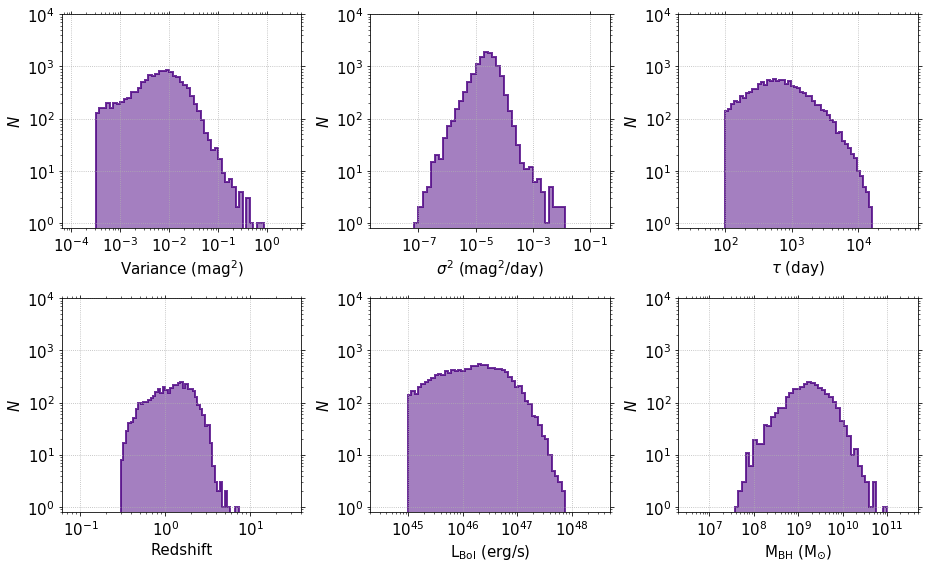

In [89]:
col = 'indigo'
plt.figure(figsize=(13, 8))

plt.subplot(2,3,1) 
mp.hist(cat.Variance[qso], label="Variance (mag$^2$)",
        xlims=[10**(-3.5), 1e0], ylims=[0.8, 1e4], log='both', color=col)
plt.subplot(2,3,2) 
mp.hist(cat.sigma[qso]**2, label="$\sigma^2$ (mag$^2$/day)",
        xlims=[1e-8, 1e-1], ylims=[0.8, 1e4], log='both', color=col)
plt.subplot(2,3,3) 
mp.hist(cat.tau[qso], label=r"$\tau$ (day)",
        xlims=[1e2, 10**(4.2)], ylims=[0.8, 1e4], log='both', color=col)
plt.subplot(2,3,4) 
mp.hist(cat.z[qso], label="Redshift",
        xlims=[0.3, 8], ylims=[0.8, 1e4], log='both', color=col)
plt.subplot(2,3,5) 
mp.hist(cat.Bol_Lum[qso], label="$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)",
        xlims=[1e45, 1e48], ylims=[0.8, 1e4], log='both', color=col)
plt.subplot(2,3,6) 
mp.hist(10**cat.LOGBH[qso], label="M$_{\mathrm{BH}}$ (M$_{\odot}$)",
        xlims=[1e7, 1e11], ylims=[0.8, 1e4], log='both', color=col)

plt.tight_layout()

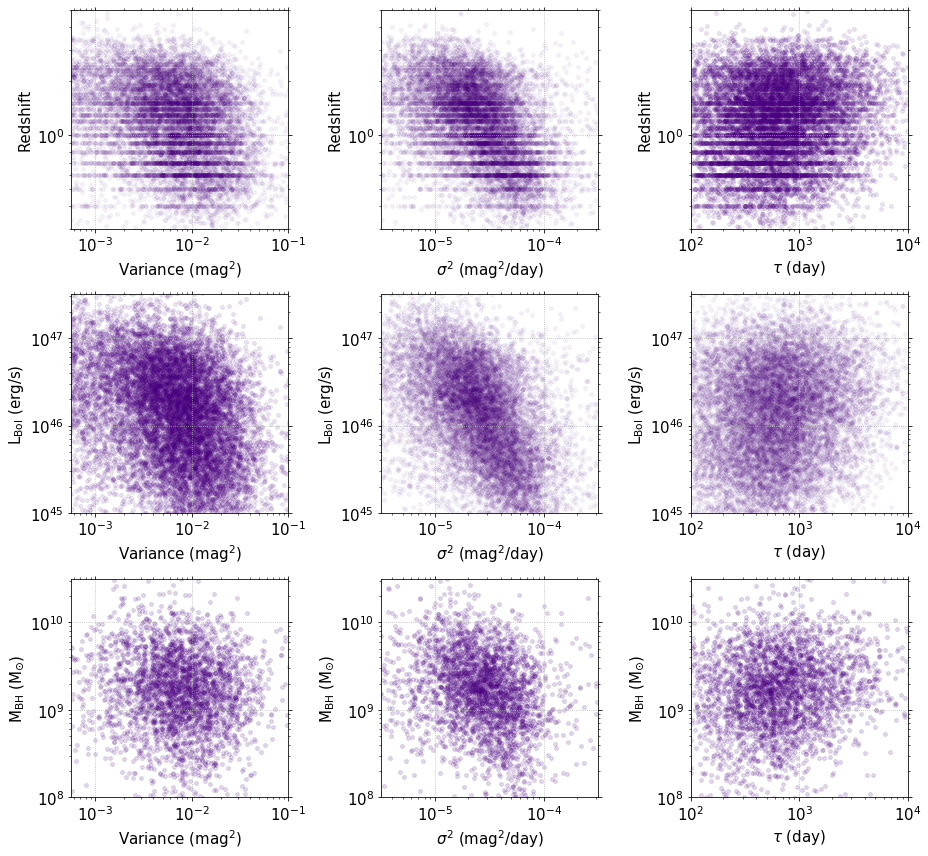

In [113]:
var_lims = [10**(-3.25), 1e-1]
sigma2_lims = [10**(-5.5), 10**(-3.5)]
tau_lims =[1e2, 1e4]
z_lims = [0.3, 5]
lum_lims = [1e45, 10**(47.5)]
bhm_lims = [1e8, 10**10.5]

plt.figure(figsize=(13, 12))
plt.subplot(3,3,1)
mp.scatter(cat.Variance[qso], cat.redshift[qso], label1="Variance (mag$^2$)", label2="Redshift", 
          xlims = var_lims, ylims = z_lims, color=col, s=15, alpha=0.05)
plt.subplot(3,3,2)
mp.scatter(cat.sigma[qso]**2, cat.redshift[qso], label1="$\sigma^2$ (mag$^2$/day)", label2="Redshift", 
          xlims = sigma2_lims, ylims = z_lims, color=col, s=15, alpha=0.05)
plt.subplot(3,3,3)
mp.scatter(cat.tau[qso], cat.redshift[qso], label1=r"$\tau$ (day)", label2="Redshift", 
          xlims = tau_lims, ylims = z_lims, color=col, s=15, alpha=0.1)
plt.subplot(3,3,4)
mp.scatter(cat.Variance[qso], cat.Bol_Lum[qso], label1="Variance (mag$^2$)", label2="$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", 
          xlims = var_lims, ylims = lum_lims, color=col, s=15, alpha=0.1)
plt.subplot(3,3,5)
mp.scatter(cat.sigma[qso]**2, cat.Bol_Lum[qso], label1="$\sigma^2$ (mag$^2$/day)", label2="$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", 
          xlims = sigma2_lims, ylims = lum_lims, color=col, s=15, alpha=0.05)
plt.subplot(3,3,6)
mp.scatter(cat.tau[qso], cat.Bol_Lum[qso], label1=r"$\tau$ (day)", label2="$\mathrm{L}_{\mathrm{Bol}}$ (erg/s)", 
          xlims = tau_lims, ylims = lum_lims, color=col, s=15, alpha=0.05)
plt.subplot(3,3,7)
mp.scatter(cat.Variance[qso], 10**cat.LOGBH[qso], label1="Variance (mag$^2$)", label2="M$_{\mathrm{BH}}$ (M$_{\odot}$)", 
          xlims = var_lims, ylims = bhm_lims, color=col, s=15, alpha=0.15)
plt.subplot(3,3,8)
mp.scatter(cat.sigma[qso]**2, 10**cat.LOGBH[qso], label1="$\sigma^2$ (mag$^2$/day)", label2="M$_{\mathrm{BH}}$ (M$_{\odot}$)", 
          xlims = sigma2_lims, ylims = bhm_lims, color=col, s=15, alpha=0.15)
plt.subplot(3,3,9)
mp.scatter(cat.tau[qso], 10**cat.LOGBH[qso], label1=r"$\tau$ (day)", label2="M$_{\mathrm{BH}}$ (M$_{\odot}$)", 
          xlims = tau_lims, ylims = bhm_lims, color=col, s=15, alpha=0.15)
plt.tight_layout()

The plots shows that some of parameters derived from the light curve have a relation with physical paramters. 
However, we have to be careful to interpret these results; 
$L_{\mathrm{bol}}$ has a positive correlation with $z$ and virial $M_{\mathrm{BH}}$ probably attributed to the selection bias. 